<a href="https://colab.research.google.com/github/teecha/GoogleColab/blob/main/geospacial_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install pysal

Plotting the per capita income per state

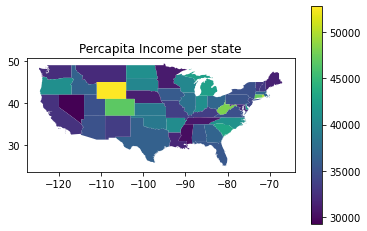

In [ ]:
import geopandas as gpd
import pysal.lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

per_cap_data = pysal.lib.io.open(pysal.lib.examples.get_path("usjoin.csv"))
us_df = gpd.read_file(pysal.lib.examples.get_path("us48.shp"))
us_df['per_cap'] = np.array(per_cap_data.by_col("2009"))
us_df.plot(column = "per_cap",legend = "True")
plt.title("Percapita Income per state")
plt.show()

Plotting centroids

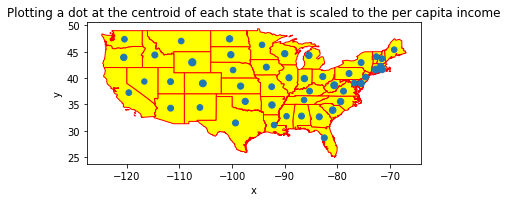

In [ ]:
us_df['centroid_column'] = us_df.centroid
centroids = list(us_df['centroid_column'])
df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))], \
                   'x':[centroids[i].x for i in range(len(centroids))], \
                   'data':list(us_df['per_cap'])})
base = us_df.plot(color='yellow', edgecolor='red', legend = "True")
df.plot( kind='scatter', x='x', y='y', s=df['data']*0.001, ax=base)
plt.title("Plotting a dot at the centroid of each state that is scaled to the per capita income")
plt.show()

Moran's I for the per capita income of each US state in 2009 using Rook Continuity

In [ ]:
from esda.moran import Moran
y = us_df['per_cap']
w = pysal.lib.io.open(pysal.lib.examples.get_path("states48.gal")).read()
mi = Moran(y, w, two_tailed=False)
print ("Moran's I for the per capita income of each US state in 2009 using Rook Continuity is = " + '\033[1m'+str(round(mi.I, 4)))

Moran's I for the per capita income of each US state in 2009 using Rook Continuity is = 0.4288
